## Are we home yet? Analyzing how Egyptian software developers work

This notebook shows an analysis of how Egyptian software developers responded to the StackOverflow survey questions related to remote work and freelancing.

This analysis is based on the results of StackOverflow surveys over the past three years; namely 2019, 2020 and 2021. Analysis over this time period gains interest since the emergence of Covid-19 have caused many organizations to shift to remote work and distributed teams, while many workers may have switched to freelancing and part-time jobs.

With this analysis, we try to answer the following 3 questions:
* What proportion of Egyptian software developers work as Freelancers?
* How does this proportion differ compared to the rest of the world?
* Did the answer to these questions change over the last three years with the emergence of Covid-19?

It's worth noting that, both the 2019 and 2020 surveys were conducted before the first widespread of Covid-19 in Egypt. Therefore, only the 2021 survey may show the effects of the pandemic on the Egyptian software industry.

## First steps
We start by importing essential libraries, and loading datasets from CSV files.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
df_2021 = pd.read_csv('datasets/survey_results_public_2021.csv');
df_2020 = pd.read_csv('datasets/survey_results_public_2020.csv');
df_2019 = pd.read_csv('datasets/survey_results_public_2019.csv');

## Data Wrangling
Next step is to filter the dataset to select fields of interest to this analysis.
Be reviewing the dataset schema, we notice some inconsistencies among data fields in the three years surveys, both in field names and the list of possible values. Such inconsistencies will difinitely affect the interpretation of our analysis. For example, the employment options didn't include "Student" in the 2019 survey, which was split into "Part-time student" and "Full-time student" in the 2021 survey.

In [3]:
# Drop irrelevant columns
df_2021 = df_2021[['Country', 'DevType', 'MainBranch', 'Employment', 'CompTotal']]
df_2020 = df_2020[['Country', 'DevType', 'MainBranch', 'Employment', 'JobFactors', 'JobSat', 'CompTotal', 'ConvertedComp']]
df_2019 = df_2019[['Country', 'DevType', 'MainBranch', 'Employment', 'JobFactors', 'JobSat', 'CompTotal', 'ConvertedComp', 'Student']]

# replace NA values with a string. No need to use other values in this analysis
df_2019.fillna('NA', inplace=True)
df_2020.fillna('NA', inplace=True)
df_2021.fillna('NA', inplace=True)

# Filter by country 
egy_2021 = df_2021[df_2021['Country'] == 'Egypt']
egy_2020 = df_2020[df_2020['Country'] == 'Egypt']
egy_2019 = df_2019[df_2019['Country'] == 'Egypt']

In [4]:
print("Number of records in 2019 dataset:", egy_2019.shape[0])
print("Number of records in 2020 dataset:", egy_2020.shape[0])
print("Number of records in 2021 dataset:", egy_2021.shape[0])

Number of records in 2019 dataset: 323
Number of records in 2020 dataset: 281
Number of records in 2021 dataset: 521


## Distribution of employment categories among Egyptian developers:

In 2019, employment options didn't include "Student" since being a student was not considered an employment style and was represented using a separate field.

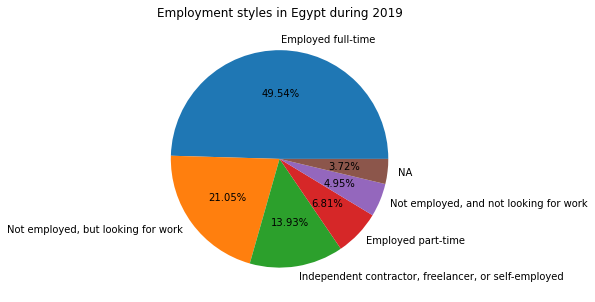

In [5]:
egy_2019['Employment'].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.2f%%').set_ylabel('');
plt.title("Employment styles in Egypt during 2019");

Almost 50% of Egyptian respondents in 2019 were full-time employees, while only about 14% were independent contractors or freelancers. 

In 2020, a "student" option was added to the "Employment" question.

### How students work in 2019?
Since a "Student" option was not included in the employment options in the 2019 survey, students had to choose from other options. Let's see what full-time students chose.

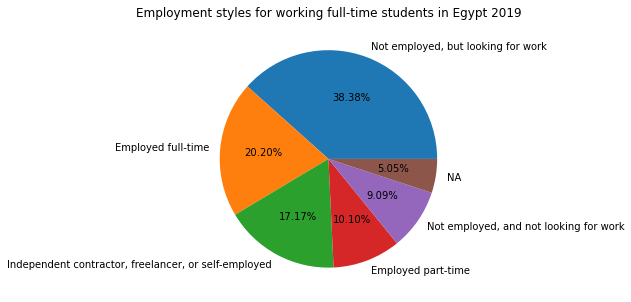

In [6]:
egy_2019[egy_2019['Student'] == 'Yes, full-time']['Employment'].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.2f%%').set_ylabel('');
plt.title("Employment styles for working full-time students in Egypt 2019");

The majority of full-time students identify themselves as "Not employed". This explains the relatively higher ratio of "Not employed" respondents in 2019 compared to 2020 and 2021. However, the remaining are distributed among the 3 main employment categories: full-time, part-time, and independent. It's hard to split them to create a dataset consistent with the 2020 and 2021 surveys without threatening the validity of results. Nonetheless, let's see how the ratios would change if we set employment to "student" for all full-time students.


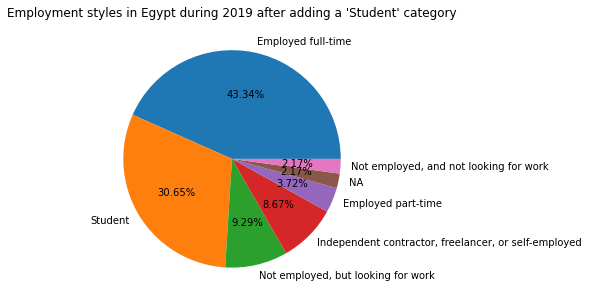

In [7]:
egy_2019_tmp = egy_2019.copy()
egy_2019_tmp.loc[egy_2019_tmp['Student'] == 'Yes, full-time', 'Employment'] = 'Student'
egy_2019_tmp['Employment'].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.2f%%').set_ylabel('');
plt.title("Employment styles in Egypt during 2019 after adding a 'Student' category");

Using this assumption, the ratio of independent contractors or freelancers decreased from almost 14% to about 9.3%, but since we cannot guarantee the validity of these results, we focus our comparison on the 2020 and 2021 surveys.

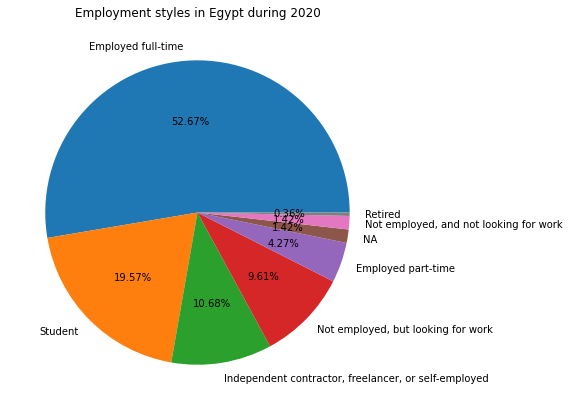

In [8]:
egy_2020['Employment'].value_counts().plot(kind='pie', figsize=(7,7), autopct='%1.2f%%').set_ylabel('');
plt.title("Employment styles in Egypt during 2020");

In the 2021 survey, the "Student" option was split into "Student, full-time" and "Student, part-time". To make the comparison easier, we combine the two categories.

In [9]:
egy_2021.loc[egy_2021['Employment'] == 'Student, full-time', 'Employment'] = 'Student'
egy_2021.loc[egy_2021['Employment'] == 'Student, part-time', 'Employment'] = 'Student'

/usr/lib64/python3.10/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/lib64/python3.10/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


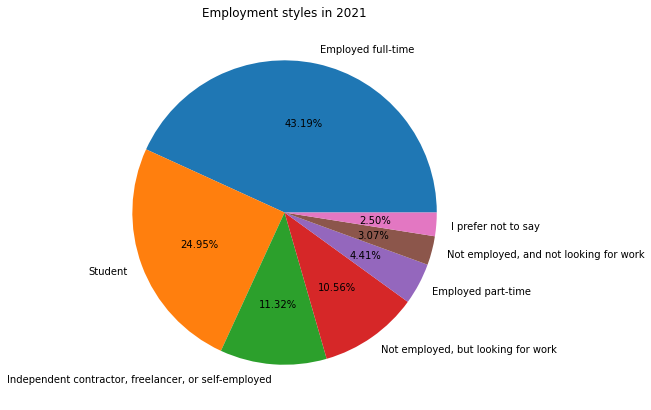

In [10]:
egy_2021['Employment'].value_counts().plot(kind='pie', figsize=(7,7), autopct='%1.2f%%').set_ylabel('');
plt.title("Employment styles in 2021");

At first glance, we can see that the ratio of full-time employees dropped from about 53% in 2020 to 43% in 2021, while the ratios of unemployed and freelancers have slightly increased.

Apparently, there is also an increase in the number of students who participated in the 2021 survey, but since we are interested in professional employment styles, we need to drop student records.

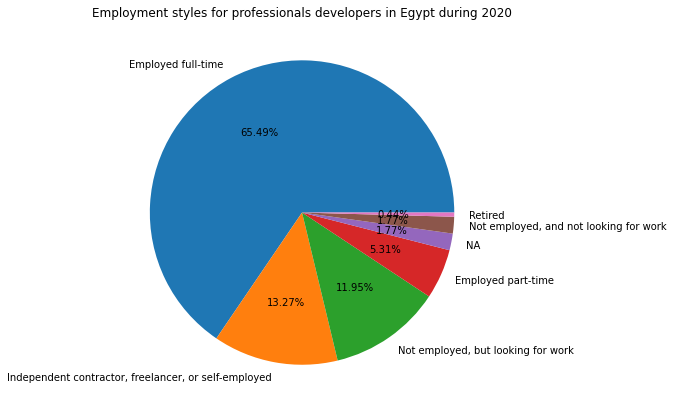

In [11]:
egy_2020_counts = egy_2020[egy_2020['Employment'] != 'Student']['Employment'].value_counts().rename('2020');
egy_2020_counts.plot(kind='pie', figsize=(7,7), autopct='%1.2f%%').set_ylabel('');
plt.title("Employment styles for professionals developers in Egypt during 2020");

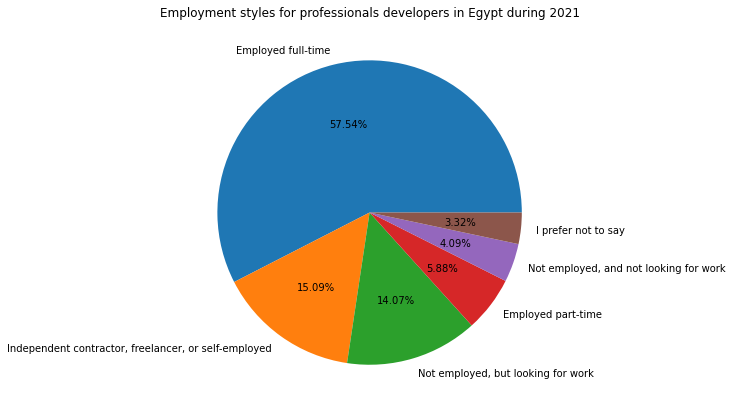

In [12]:
egy_2021_counts = egy_2021[egy_2021['Employment'] != 'Student']['Employment'].value_counts().rename('2021');
egy_2021_counts.plot(kind='pie', figsize=(7,7), autopct='%1.2f%%').set_ylabel('');
plt.title("Employment styles for professionals developers in Egypt during 2021");

With the exclusion of "Student" records, the trend is even more clear. There is a significant decrease in the ratio of full time employees and an increase in the ratio of freelancers and unemployed. This could likely be due to the Covid-19 crisis.

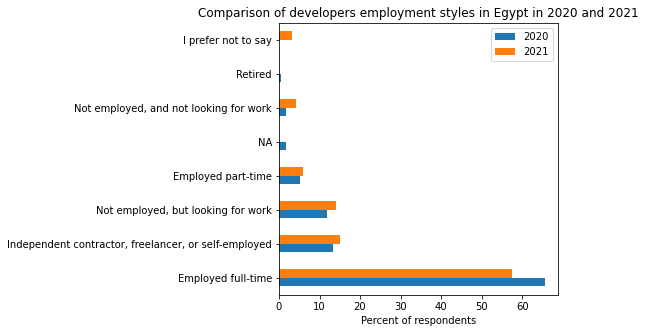

In [13]:
#add value counts of two years in a single dataframe
egy_merged = pd.concat([egy_2020_counts, egy_2021_counts], axis=1);

#replace counts with precentages
egy_merged['2020'] = (egy_merged['2020'] / egy_merged['2020'].sum()) * 100
egy_merged['2021'] = (egy_merged['2021'] / egy_merged['2021'].sum()) * 100

#plot the combined dataframe
egy_merged.plot(kind='barh', figsize=(5,5));
plt.title('Comparison of developers employment styles in Egypt in 2020 and 2021');
plt.xlabel("Percent of respondents");

## Distribution of employment categories worldwide

Now, we perform the same analysis with the entire SO dataset that includes respondants from all over the world.

In [14]:
df_2021.loc[df_2021['Employment'] == 'Student, full-time', 'Employment'] = 'Student'
df_2021.loc[df_2021['Employment'] == 'Student, part-time', 'Employment'] = 'Student'

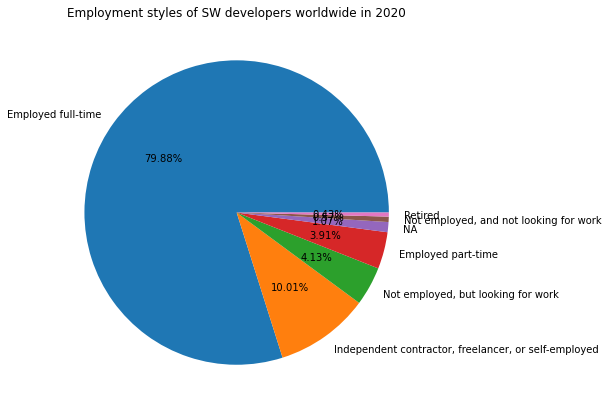

In [15]:
df_2020[df_2020['Employment'] != 'Student']['Employment'].value_counts().plot(kind='pie', figsize=(7,7), autopct='%1.2f%%').set_ylabel('');
plt.title("Employment styles of SW developers worldwide in 2020");

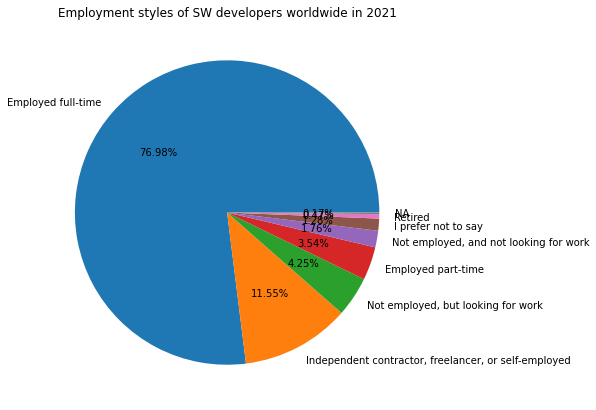

In [16]:
df_2021[df_2021['Employment'] != 'Student']['Employment'].value_counts().plot(kind='pie', figsize=(7,7), autopct='%1.2f%%').set_ylabel('');
plt.title("Employment styles of SW developers worldwide in 2021");

Comparing worldwide records of the 2020 and 2021 shows a similar trend; The ratio of full-time employees has decreased significantly while the ratios of unemployed and freelancers have increased. 

## Conclusions
The Covid-19 pandemic has clearly affected our lifestyle in many ways. Statistics indicate that the percentage of Egyptian software developers who work in full-time jobs has decreased in 2021 compared to 2020, while the percentage of unemployed, freelancers, and part-time developers have increased.

In addition, comparing employment styles in Egypt with global statistics may indicate that Egyptian software developers have a lower job stability than global average. In 2021, for example, there is a relatively larger decrease in the ratio of full-time employees, which was already lower than global records. On the other hand, Egypt may also have a higher-than-average ratio of freelancers and independent contractors.